<h2>Kyphosis (Decision Tree Classifier)

In [27]:
import pandas as pd
import numpy as np

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
%matplotlib inline

In [30]:
df = pd.read_csv('kyphosis.csv')

In [31]:
df.head()


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [32]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [34]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Kyphosis, Age, Number, Start]
Index: []


In [35]:
print(df.isna().any())

Kyphosis    False
Age         False
Number      False
Start       False
dtype: bool


<h2>EDA

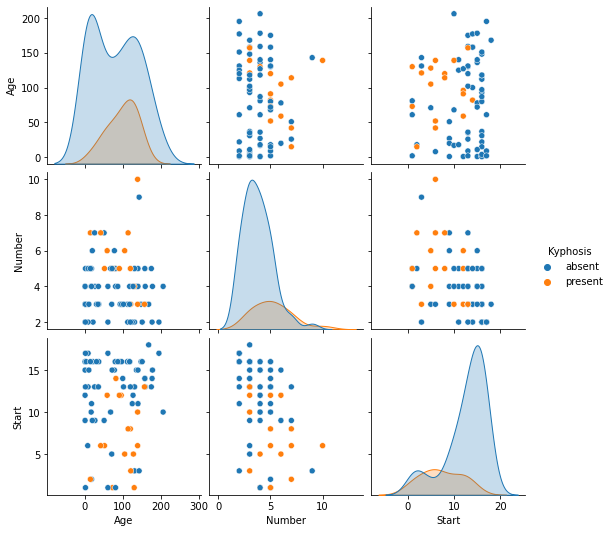

In [36]:
sns.pairplot(df,hue='Kyphosis')

In [37]:
cols = df.columns

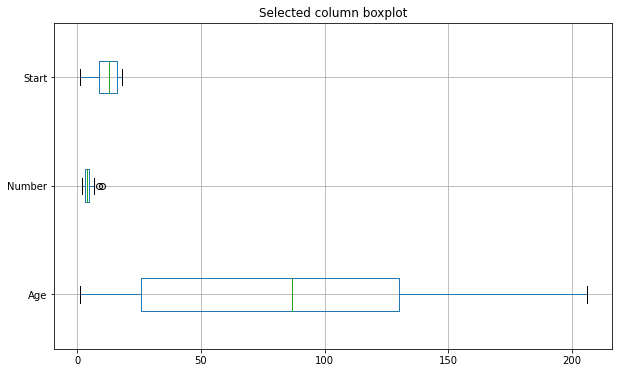

In [38]:
df[cols].boxplot(grid=True, vert=False, figsize=(10, 6))
plt.title('Selected column boxplot')
plt.show()

<h2>Train Test Split

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
X = df.drop('Kyphosis', axis=1)

In [41]:
y = df['Kyphosis']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

<h2>Decision Trees

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree = DecisionTreeClassifier()

In [45]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

<h2>Predictions and Evaluations

In [46]:
predictions = dtree.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(confusion_matrix(y_test,predictions))


[[16  2]
 [ 5  2]]


In [49]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

      absent       0.76      0.89      0.82        18
     present       0.50      0.29      0.36         7

    accuracy                           0.72        25
   macro avg       0.63      0.59      0.59        25
weighted avg       0.69      0.72      0.69        25



In [50]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini', 'entropy'), 'max_depth':list(range(1,5)),'min_samples_split':list(range(2,4)),'min_samples_leaf':list(range(1,9)),'max_leaf_nodes':list(range(2,8))}

clf = GridSearchCV(dtree, parameters, cv=4)
clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3]})

In [51]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [52]:
print(clf.score(X_test,y_test))
mypred=clf.predict(X_test)

0.68


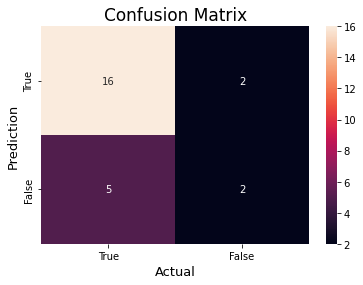

In [53]:
ncm = confusion_matrix(y_test,predictions)

sns.heatmap(ncm,
            annot=True,
            fmt='g',
            xticklabels=['True','False'],
            yticklabels=['True','False'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

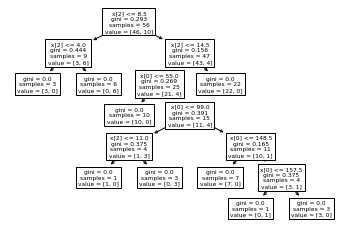

<Figure size 1440x1080 with 0 Axes>

In [54]:
from sklearn import tree
x=tree.plot_tree(dtree)
fig = plt.figure(figsize=(20,15))

<h2>Random Forests

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(n_estimators=200)

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [58]:
rfc_pred = rfc.predict(X_test)

In [59]:
print(confusion_matrix(y_test,rfc_pred))

[[17  1]
 [ 6  1]]


In [60]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.74      0.94      0.83        18
     present       0.50      0.14      0.22         7

    accuracy                           0.72        25
   macro avg       0.62      0.54      0.53        25
weighted avg       0.67      0.72      0.66        25



In [61]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [62]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64